# Tutorial: Crystallization of Silicon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase
import ase.io as aseio
import nglview

_ColormakerRegistry()

## Plot COLVAR file

The COLVAR files contains most of the interesting output of the simulation. Let's have a look at the first few lines.

In [2]:
N=5
myfile=open("COLVAR")
for x in range(N):
    print(next(myfile))

#! FIELDS time es.mean es.morethan metad.bias metad.work

 0.000000 0.860256 206.904083 0.000000 0.000000

 1.000000 0.875663 207.609017 0.000000 0.000000

 2.000000 0.857160 206.815344 57.936594 60.000000

 3.000000 0.861571 205.823546 102.511738 115.185103



As the first line points out, the columns correspond to the time (in ps), the mean of the kernels, the number of kernels that are above the threshold 0.5, the metadynamics bias, and the metadynamics work.

Let's plot some of this quantities.

In [3]:
COLVAR=np.genfromtxt("COLVAR")

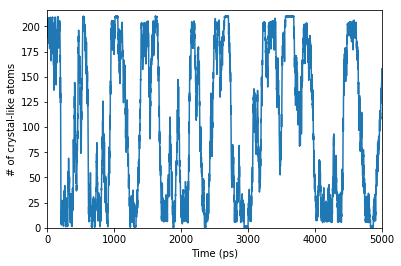

In [4]:
plt.plot(COLVAR[:,0],COLVAR[:,2])
plt.xlabel("Time (ps)")
plt.ylabel("# of crystal-like atoms")
plt.xlim([0,5000])
plt.ylim([0,216])
plt.show()

The plot above shows the CV as a function of time. We see that the system is going reversibly from the liquid (CV ~ 0) to the solid (CV ~ 216).

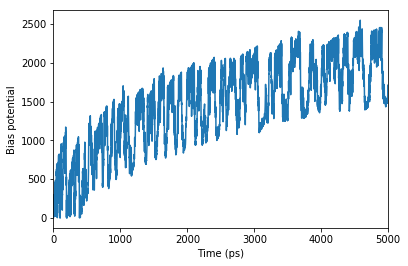

In [5]:
plt.plot(COLVAR[:,0],COLVAR[:,3])
plt.xlabel("Time (ps)")
plt.ylabel("Bias potential")
plt.xlim([0,5000])
plt.show()

The plot above shows the evolution of the bias potential. We see that on average it increases over time although the pace at which it grows decreases. This is a chracteristic of well tempered metadynamics: the bias potential changes more and more slowly as the simulation progresses. However, it will never stop growing and thus the bias potential will only be stationary in the infinite time limit.

## Plot FES

Now, let's plot the FES that should be stored in the fes.dat file if you ran the command ```$plumedexe sum_hills --hills HILLS```.

In [6]:
fes=np.genfromtxt("fes.dat")

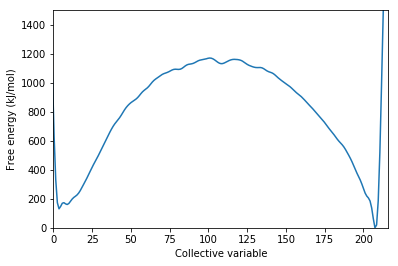

In [7]:
plt.plot(fes[:,0],fes[:,1]-np.amin(fes[:,1]))
plt.xlabel("Collective variable")
plt.ylabel("Free energy (kJ/mol)")
plt.xlim([0,216])
plt.ylim([0,1500])
plt.show()

In order to asses convergence we can also calculate the FES as a function of simulation time. Let's calculate it every 250 ps with the command ```$plumedexe sum_hills --hills HILLS --stride=250```

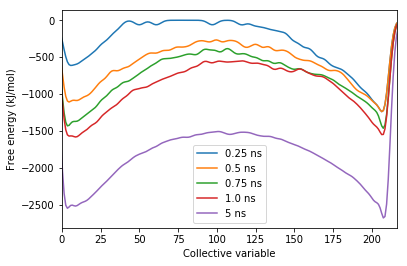

In [8]:
for i in range(4):
    fes=np.genfromtxt("fes_" + str(i) + ".dat")
    plt.plot(fes[:,0],fes[:,1],label=str((i+1)*0.25) + " ns")
fes=np.genfromtxt("fes.dat")
plt.plot(fes[:,0],fes[:,1],label="5 ns")
plt.xlabel("Collective variable")
plt.ylabel("Free energy (kJ/mol)")
plt.xlim([0,216])
plt.legend()
#plt.ylim([0,1500])
plt.show()

The figure above shows that during the first ns the shape of the FES changes substantially. After this simulation time the overall shape does not change substantially and only fine features are improved.

We can approximate the difference in free energy between the liquid and the solid as a the difference in height between the two minima. Let's calculate that.

In [9]:
fes=np.genfromtxt("fes.dat")
N=fes.shape[0]
freeEnergyLiquid=np.amin(fes[:int(N/2)])
freeEnergySolid=np.amin(fes[int(N/2):])
deltaFreeEnergy=freeEnergySolid-freeEnergyLiquid
print("The difference in free energy between the solid and the liquid is: " + "{:.{}f}".format(deltaFreeEnergy,2) + " kJ/mol or " + "{:.{}f}".format(deltaFreeEnergy/14.134,2) + " kT.")
print("Therefore at this temperature the solid is more stable than the liquid.")

The difference in free energy between the solid and the liquid is: -131.02 kJ/mol or -9.27 kT.
Therefore at this temperature the solid is more stable than the liquid.


Bear in mind that the proper way to calculate the free energy of a basin is performing an integration.

# Visualize the trajectory

In [10]:
conf = aseio.read("si.lammps-dump-text",index=':')
v = nglview.show_asetraj(conf)
v.add_representation("unitcell")
display(v)

NGLWidget()